In [1]:
intro_images_path='../dataset_part1/Images/Intro_images/'
edge_images_path='../dataset_part1/Images/Edge_images/'
seg_images_path='../dataset_part1/Images/Seg_images/'
feature_images_path='../dataset_part1/Images/Feature_images/'
output_path='../dataset_part1/Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2023/24


<img src="./Logotipo_Solo.png" width=200/>

## Image  geometric transformations




http://szeliski.org/Book/

https://docs.opencv.org/4.3.0/da/d6e/tutorial_py_geometric_transformations.html

There are a number of basic geometric transformations we can perform on an image. OpenCV provides two transformation functions, **cv.warpAffine** and **cv.warpPerspective**, with which you can perform all kinds of transformations. cv.warpAffine takes a 2x3 transformation matrix, while cv.warpPerspective takes a 3x3 transformation matrix as inputs.



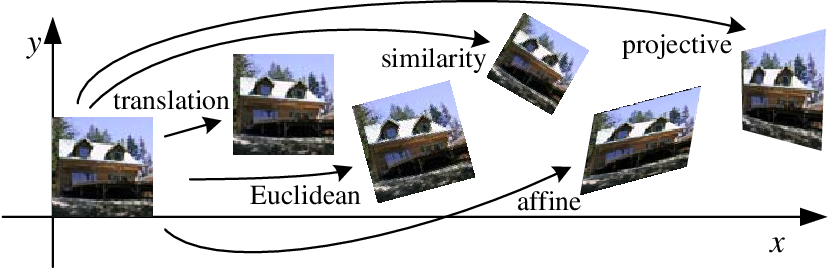


### Image translation

Translation is the shifting of pixels locations. Given the shift in the (x,y) direcion, (tx,ty), you can create the following transformation matrix M to be used with pixels homogeneous coordinates:

    M=[[1, 0, tx],
       [0, 1, ty]]
   





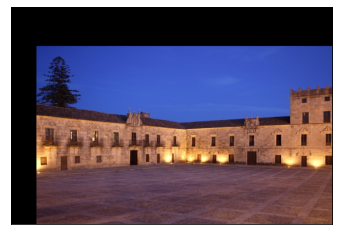

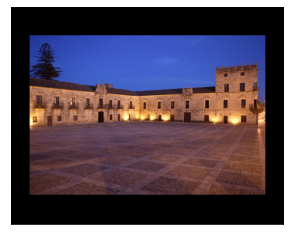

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys

# Load an color image in grayscale
img = cv2.imread(intro_images_path +'pazo.jpg')

if img is None:
    sys.exit('Failing at loading image')

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
#translation with image cropping
img_tc = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)

plt.imshow(img_tc)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#translation without image cropping
img_t = cv2.warpAffine(img, translation_matrix, (num_cols+ 2*int(translation_matrix[0,2]), num_rows+ 2*int(translation_matrix[1,2])), cv2.INTER_LINEAR)

plt.imshow(img_t)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Image rotation

Rotation of an image by an angle θ is achieved by the transformation matrix of the form

    M=[[cosθ,  sinθ],
       [−sinθ, cosθ]]

OpenCV also provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer.The modified transformation matrix is given by

    M=[[α,  β, (1−α)⋅center.x−β⋅center.y], 
       [-β  α, β⋅center.x+(1−α)⋅center.y]]

where:

    α=scale⋅cosθ,
    β=scale⋅sinθ

To find this transformation matrix, write the affine transformation yourself and call OpenCv functions **cv2.warpAffine(image, M, output_shape)**. Alternatively, OpenCV provides a function, **cv.getRotationMatrix2D(center, angle, scale)**.


#### Alternative 1

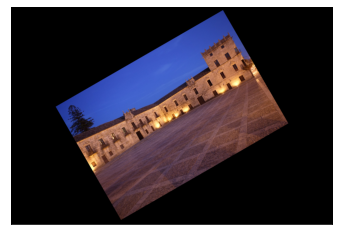

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 


def get_affine_M(c, a, s):
    sin_theta = np.sin(a)
    cos_theta = np.cos(a)
    
    m_11 = s * cos_theta
    m_21 = -s * sin_theta
    
    m_12 = s * sin_theta
    m_22 = s * cos_theta
        
    m_13 = c[0] * (1 - s * cos_theta) - s * sin_theta * c[1]
    m_23 = c[1] * (1 - s * cos_theta) + s * sin_theta * c[0]
                                                          
    return np.array([[m_11, m_12, m_13],[m_21, m_22, m_23]])

#Load an image 
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    
rows,cols = img.shape[:2]
center=((cols-1)/2, (rows-1)/2)
angle=30
scale=0.6

                    
M = get_affine_M(center, np.deg2rad(angle), scale)

img_r = cv2.warpAffine(img, M, (cols, rows))
                    
plt.imshow(img_r)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#### Alternative 2

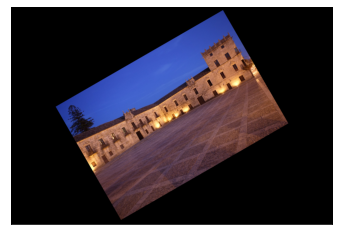

In [4]:
import numpy as np
import cv2 

img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows,cols = img.shape[:2]
center=((cols-1)/2, (rows-1)/2)
angle=30
scale=0.6

M=cv2.getRotationMatrix2D(center, angle, scale)

img_r = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(img_r)
plt.xticks([]), plt.yticks([]) 
plt.show()

### Image scaling

This is a commonly used transformation in computer vision where we try to resize the image according to the requirement. Image scaling allows either to enlarge or to shrink images. OpenCV provides function resize to scale images.


These are the interpolation methods provided by OpenCV to perform scaling operations:

- cv2.INTER_AREA uses pixel area relation for resampling. This is the best method for reducing the size of an image. When used for zooming into the image, it uses the INTER_NEAREST method.
    
- cv2.INTER_CUBIC uses bicubic interpolation for resizing. This method performs calculations based on the 4×4 neighboring pixels for the pixels. It takes the weighted average of these 16 pixels to create a new pixel.

- cv2.INTER_LINEAR is similar to the INTER_CUBIC interpolation. However, INTER_CUBIC only uses 2×2 neighboring pixels to get the weighted average for the pixels.

- cv2.INTER_NEAREST uses the nearest neighbor concept for interpolation. This uses only one neighboring pixel from the image for interpolation.

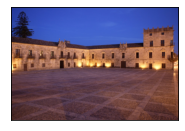

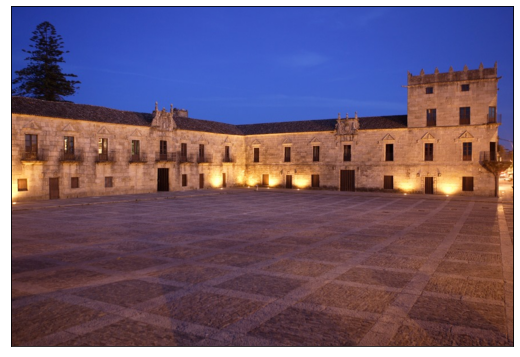

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

img_shrinked = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
plt.figure(figsize= (0.01*img_shrinked.shape[0],0.01*img_shrinked.shape[1]));plt.imshow(img_shrinked)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


img_enlarged = cv2.resize(img,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
plt.figure(figsize= (0.01*img_enlarged.shape[0],0.01*img_enlarged.shape[1]));plt.imshow(img_enlarged)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Affine Transformations

https://docs.opencv.org/4.3.0/df/d9d/tutorial_py_colorspaces.html


In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

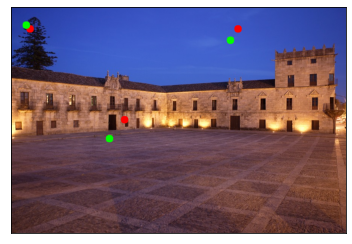

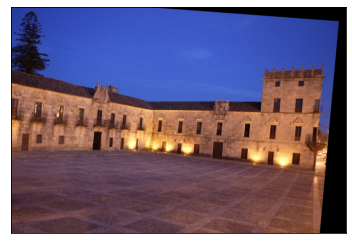

M= [[  0.98181818  -0.10606061  -2.72727273]
 [  0.07272727   1.17424242 -24.09090909]]


In [6]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

image=img.copy()

pts1 = np.float32([[50,60],[600,60],[300,300]])
pts2 = np.float32([[40,50],[580,90],[260,350]])

for pt in pts1:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (255, 0, 0),-1)
for pt in pts2:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (0, 255, 0),-1)

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))


plt.figure(figsize= (0.01*image.shape[0],0.01*image.shape[1]));plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.figure(figsize= (0.01*dst.shape[0],0.01*dst.shape[1]));plt.imshow(dst)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

print('M= {}'.format(M))


### Perspective transformation

For perspective transformation you need a 3x3 transformation matrix to be used with homogeneous coordiantes of pixels' locations. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the first view and corresponding points on the second view. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function **cv2.getPerspectiveTransform**. Then apply **c2v.warpPerspective** with this 3x3 transformation matrix.

The function cv2.warpPerspective() applies a perspective transformation to an image:
dst=cv2.warpPerspective(src, h, dsize)

- src: input image.
- dst: output image that has the size dsize and the same type as src .
- h: homography (3×3 transformation matrix).
- Dsize: size of the output image.

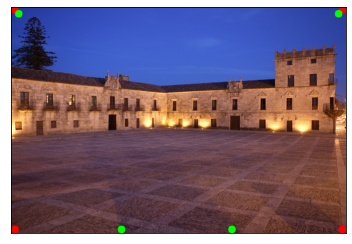

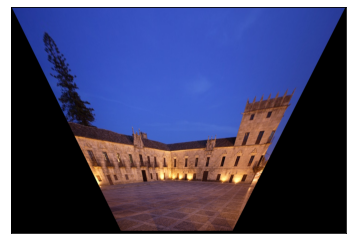

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

rows, cols=img.shape[:2]
pts1 = np.float32([[10,10], [cols-10,10], [10,rows-10], [cols-10,rows-10]])
pts2 = np.float32([[20,20], [cols-20,20], [int(0.33*cols),rows-10], [int(0.66*cols),rows-10]])

P_M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, P_M, (cols,rows))

image=img.copy()

for pt in pts1:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (255, 0, 0),-1)
for pt in pts2:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (0, 255, 0),-1)


plt.figure(figsize= (0.01*image.shape[0],0.01*image.shape[1]));plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.figure(figsize= (0.01*dst.shape[0],0.01*dst.shape[1]));plt.imshow(dst)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



#### Exercise: Compute the homography between two views of the same scene

In [8]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'library1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'library2.jpg', cv2.IMREAD_COLOR) 


## Chose 4 (not all aligned) corresponging points
#WRITE DOWN THEIR COODINATES!!
cv2.imshow('View 1', im1)
cv2.imshow('View 2', im2)

k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()


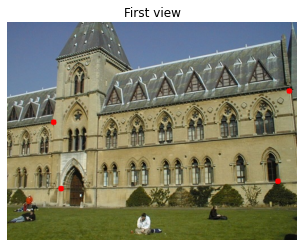

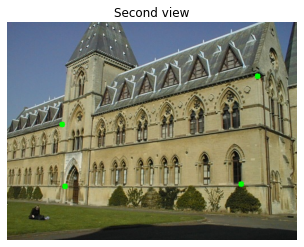

384 512 384 512


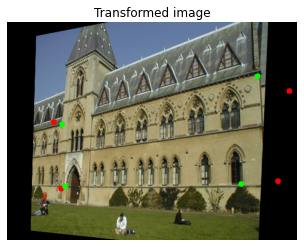

H= [[ 5.66066376e-01 -2.40355476e-02  5.12987124e+01]
 [-1.26668550e-01  9.05356791e-01  2.45230135e+01]
 [-5.15884731e-04  3.45153520e-05  1.00000000e+00]]


In [61]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'library1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'library2.jpg', cv2.IMREAD_COLOR) 

im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 


# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

#INSERT HERE THE COORDINATES YOU HAVE WROTE DOWN 
#CHANGING THE CURRENT VALUES!!
points1[0, :] = [82,176]
points1[1, :] = [95,293]
points1[2, :] = [498,121]
points1[3, :] = [478,280]

points2[0, :] = [97,180]
points2[1, :] = [102,289]
points2[2, :] = [442,95]
points2[3, :] = [413,285]

im1c=im1.copy()
im2c=im2.copy()



for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()

# Find homography 

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 
height1, width1, _ = im1.shape 
height2, width2, _ = im2.shape 
print(height1, width1, height2, width2)
#Aligned image im1Reg, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1, h, (1*width1 + 0*width2, 1*height1+ 0*height2)) 


for pt in points1:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(imP), plt.title("Transformed image")
plt.axis('off')
plt.show()

# Print estimated homography 

print('H= {}'.format(h)) 

#### Exercise: Combine two images

In [7]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'Logo_Paris.png', cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'eiffel.jpg', cv2.IMREAD_COLOR) 


## Chose 4 (not all aligned) corresponging points
cv2.imshow('View 1', im1)
cv2.imshow('View 2', im2)

k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()


: 

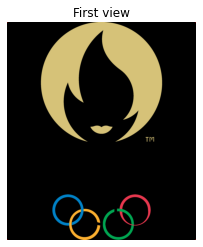

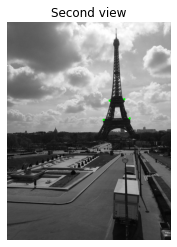

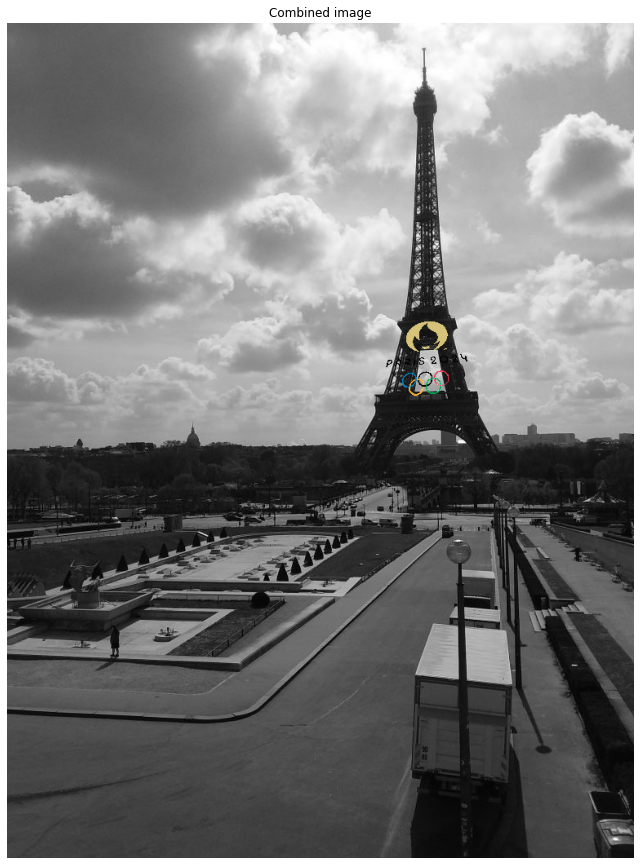

H= [[ 2.35259605e-02 -8.91205081e-02  4.79951054e+02]
 [-8.82768009e-03 -4.28015865e-02  3.68964780e+02]
 [-1.54202909e-05 -1.72220170e-04  1.00000000e+00]]


In [4]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'Logo_Paris.png', cv2.IMREAD_UNCHANGED) 

# Read second view 
im2 = cv2.imread(intro_images_path+'eiffel.jpg', cv2.IMREAD_COLOR) 

mask=im1[:,:,3]
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 

# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

points1[0, :] = [2,2]
points1[1, :] = [2158,2]
points1[2, :] = [2, 2484]
points1[3, :] = [2158,2484]

points2[0, :] = [480,369]
points2[1, :] = [549,362]
points2[2, :] = [452,459]
points2[3, :] = [574,452]

im1c=im1.copy()
im2c=im2.copy()

for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()

# Find homography 
h,_ = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 
height1, width1, _ = im1c.shape 
height2, width2, _ = im2c.shape 

#Aligned image im1, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1, h, (width2,height2))
maskP= cv2.warpPerspective(mask, h, (width2,height2))

maskP_inv = cv2.bitwise_not(maskP)

im_bg = cv2.bitwise_and(im2,im2,mask = maskP_inv)

im_fg = cv2.bitwise_and(imP,imP,mask = maskP)

res=cv2.add(im_bg,im_fg)# mask=im_mP)

plt.figure(figsize= (0.02*res.shape[0],0.02*res.shape[1]));
plt.imshow(res), plt.title("Combined image")
plt.axis('off')
plt.show()

# Print estimated homography 

print('H= {}'.format(h)) 

### EXERCISE

Transform the image torre_hercules_1.jpg to get a view of the same scene as if it were captured from the same point of view as torre_hercules_2.jpg

1371 1055 1040 778


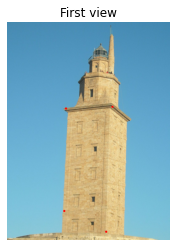

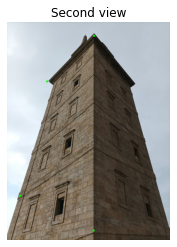

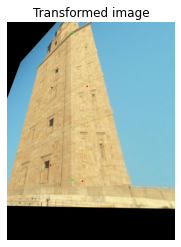

H= [[ 3.98639016e-01 -1.89702628e-01  8.52875865e+01]
 [-6.38541873e-01  2.52672164e-01  2.51867501e+02]
 [-5.58818747e-04 -5.31946983e-04  1.00000000e+00]]


In [2]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'torre_hercules_1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'torre_hercules_2.jpg', cv2.IMREAD_COLOR) 

im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 

height1, width1, _ = im1.shape 
height2, width2, _ = im2.shape 
im1_1=cv2.resize(im1,(width2,height2))

print(height1, width1, height2, width2)

# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

#INSERT HERE THE COORDINATES YOU HAVE WROTE DOWN 
#CHANGING THE CURRENT VALUES!!
points1[0, :] = [281,412]
points1[1, :] = [503,404]
points1[2, :] = [273,901]
points1[3, :] = [473,1000]

points2[0, :] = [191,283]
points2[1, :] = [415,65]
points2[2, :] = [63,829]
points2[3, :] = [413,994]

im1c=im1_1.copy()
im2c=im2.copy()



for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()

# Find homography 

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 

#Aligned image im1Reg, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1_1, h, (1*width1 + 0*width2, 1*height1+ 0*height2)) 



for pt in points1:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
#translation with image cropping
#imP = cv2.warpAffine(imP, translation_matrix, (1040,778), cv2.INTER_LINEAR)


plt.imshow(imP), plt.title("Transformed image")
plt.axis('off')
plt.show()

# Print estimated homography 

print('H= {}'.format(h)) 

By defining 4 points in each of the images we achieve, by calculating the homography, that one image seems to be taken from the point of view of the other. The final result could be better but for that we would have to adjust very carefully all the points used to calculate the homography so that they are perfectly aligned.